<a href="https://colab.research.google.com/github/CarolinaValen/Data_Analytics_2/blob/main/Python/Unit_3Assignment/Unit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [6]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [7]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [8]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [9]:
# Mean of all salaries
df["salary"].mean()

113706.45843828715

In [10]:
# Median of all salaries
df["salary"].median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [11]:
s_df = df[['sex','salary']]
print(s_df)

      sex  salary
0    Male  139750
1    Male  173200
2    Male   79750
3    Male  115000
4    Male  141500
..    ...     ...
392  Male  103106
393  Male  150564
394  Male  101738
395  Male   95329
396  Male   81035

[397 rows x 2 columns]


Finding the Median salary for all males

In [12]:
male_df = s_df[(s_df['sex'] == 'Male')]
male_df['salary'].median()

108043.0

Finding the Median salary for all females

In [13]:
female_df = s_df[(s_df['sex'] == 'Female')]
female_df['salary'].median()

103750.0

Comparing the Mean salary of Males and Females

In [14]:
# The difference between mean salaries of male and female
compare = male_df['salary'].mean() - female_df['salary'].mean()
print(compare)

14088.008738003162


# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [15]:
ys_df = df[['yrs.service','salary']]
print(ys_df)

     yrs.service  salary
0             18  139750
1             16  173200
2              3   79750
3             39  115000
4             41  141500
..           ...     ...
392           30  103106
393           19  150564
394           25  101738
395           15   95329
396            4   81035

[397 rows x 2 columns]


In [16]:
E_20 = ys_df[ys_df['yrs.service']>=20]
E_20.count()

yrs.service    157
salary         157
dtype: int64

In [17]:
E_20['salary'].mean()

122520.65605095541

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [18]:
E_less20 = ys_df[ys_df['yrs.service']<20]

In [19]:
E_less20['salary'].mean()

107940.50416666667

In [20]:
compare_less20 = E_20['salary'].mean() - E_less20['salary'].mean()
print(compare_less20)

14580.151884288745


People who have salary of greater than or equal to 200,000

In [21]:
more_200 = ys_df[ys_df['salary']>=200000]
more_200.count()

yrs.service    3
salary         3
dtype: int64

The mean salary of those who have less tha 20 years of experience is less than the mean salary of those that have more than 20 years of experience so, more expirence equals a larger salary


# Rename values, subset columns, etc

In [22]:
new_df = df.rename(columns={'Unnamed: 0':'Numbers','rank':'title','salary':'earnings'})
new_df

,Numbers,title,discipline,yrs.since.phd,yrs.service,sex,earnings
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [23]:
df = df.set_index('rank')
df = df.rename(index={'Prof':'Professor'})
print(df)

           Unnamed: 0 discipline  yrs.since.phd  yrs.service   sex  salary
rank                                                                      
Professor           1          B             19           18  Male  139750
Professor           2          B             20           16  Male  173200
AsstProf            3          B              4            3  Male   79750
Professor           4          B             45           39  Male  115000
Professor           5          B             40           41  Male  141500
...               ...        ...            ...          ...   ...     ...
Professor         393          A             33           30  Male  103106
Professor         394          A             31           19  Male  150564
Professor         395          A             42           25  Male  101738
Professor         396          A             25           15  Male   95329
AsstProf          397          A              8            4  Male   81035

[397 rows x 6 columns]


# Create some simple visualizations showing some simple statistics

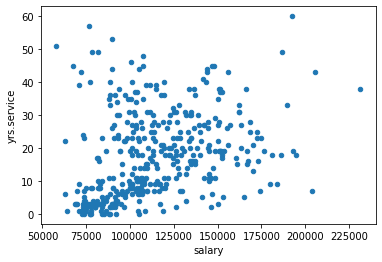

In [32]:
df.plot(x = 'salary', y = 'yrs.service', kind = 'scatter')

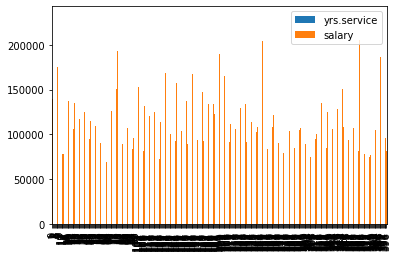

In [34]:
ys_df.plot.bar()

In [ ]:
#plot salary diff between men and women

Your observations from the visuals: 

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

The average salaries for females are lower than the average salaries for the males therefore men earn more


I also discovered that 


*   People generally earn more if they have more than 20 years of experience

*   There are three people that earn over 200k which means that the average salary for a person would be lower if those three were taken out






